# Hubbard parameter calculations for figures

In [1]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

import sys
import os

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)


# Equalization

## 1D chain

Wannier: Number of integration grid set to 257.
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
Lattice: lattice shape is square; lattice constants set to: (1550, 1550)
Lattice: lattice shape is square
Lattice: Full lattice sizes: [10  1]
Lattice: lattice constants: [1.55 1.55]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[66 20 20] is set.
DVR: R0=[9.975 3.    7.2  ]w is set.
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Illegal x0 provided. Use no initial guess.

Equalize: Initial trap depths: [1. 1. 1. 1. 1.]
Equalize: Initial trap centers:
[[-6.975  0.   ]
 [-5.425  0.   ]
 [-3.875  0.   ]
 [-2.325  0.   ]
 [-0.775  0.   ]]
Lattice: Full lattice sizes updated to: [10  1  1]
Lattice: lattice constants updated to: [1.55 1.55 1.55]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=

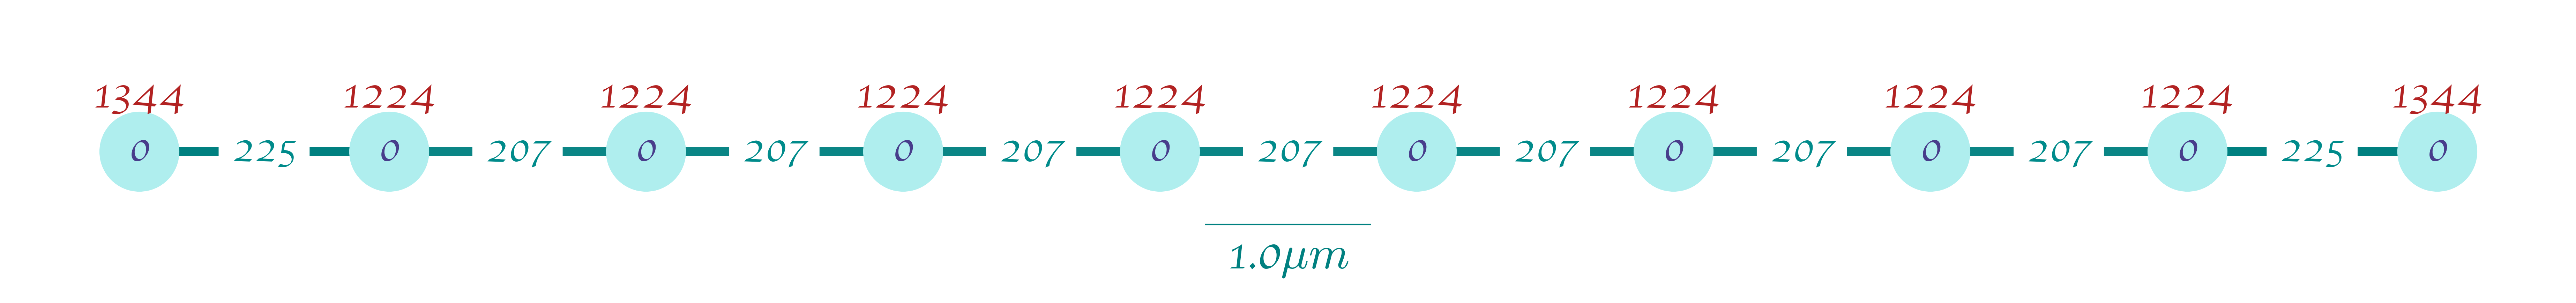

In [18]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 10
Ly = 1
d = 3
shape = "square"
w = None
eqt = "UvT"
meth = "trf"
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(
    N,
    R0=R0,
    lattice=np.array([L, Ly], dtype=int),
    trap=(52.26, 1000),
    lc=(1550,),
    ascatt=1770,
    laser=780,
    band=1,
    sparse=True,
    shape=shape,
    waist=w,
    equalize=False,
    equalize_V0=False,
    eqtarget=eqt,
    eqmethod=meth,
    ghost=True,
    symmetry=True,
    verbosity=3,
)

fn = f"../../output/Hubbard/ghost/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini"
G = read_file(fn, G)
G.draw_graph(nnn=False, A=G.A, U=G.U)
maskedA = G.ghost.mask_quantity(G.A)
maskedU = G.ghost.mask_quantity(G.U)
nnt = G.nn_tunneling(maskedA)
links = G.xy_links(G.ghost.links)
func = lambda x: np.max(x) - np.min(x)
tx, ty = G.txy_target(nnt, links, func)
ty = 0
V = np.diag(maskedA)
print("t max_err = ", max(tx, ty) * 1e-3 / G.sf)
print("V max_err = ", (np.max(V) - np.min(V)) / G.sf)
print("U max_err = ", (np.max(maskedU) - np.min(maskedU)) / G.sf)


## 2D square

Wannier: Number of integration grid set to 257.
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Lattice: lattice shape is square
Lattice: Full lattice sizes: [5 5]
Lattice: lattice constants: [1.55 1.6 ]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[40 41 20] is set.
DVR: R0=[6.1 6.2 7.2]w is set.
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Illegal x0 provided. Use no initial guess.

Equalize: Initial trap depths: [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Equalize: Initial trap centers:
[[-3.1  -3.2 ]
 [-3.1  -1.6 ]
 [-3.1   0.  ]
 [-1.55 -3.2 ]
 [-1.55 -1.6 ]
 [-1.55  0.  ]
 [ 0.   -3.2 ]
 [ 0.   -1.6 ]
 [ 0.    0.  ]]
Lattice: Full lattice sizes updated to: [5 5 1]
Lattice: lattice constants updated to: [1.55 1.6  1.55

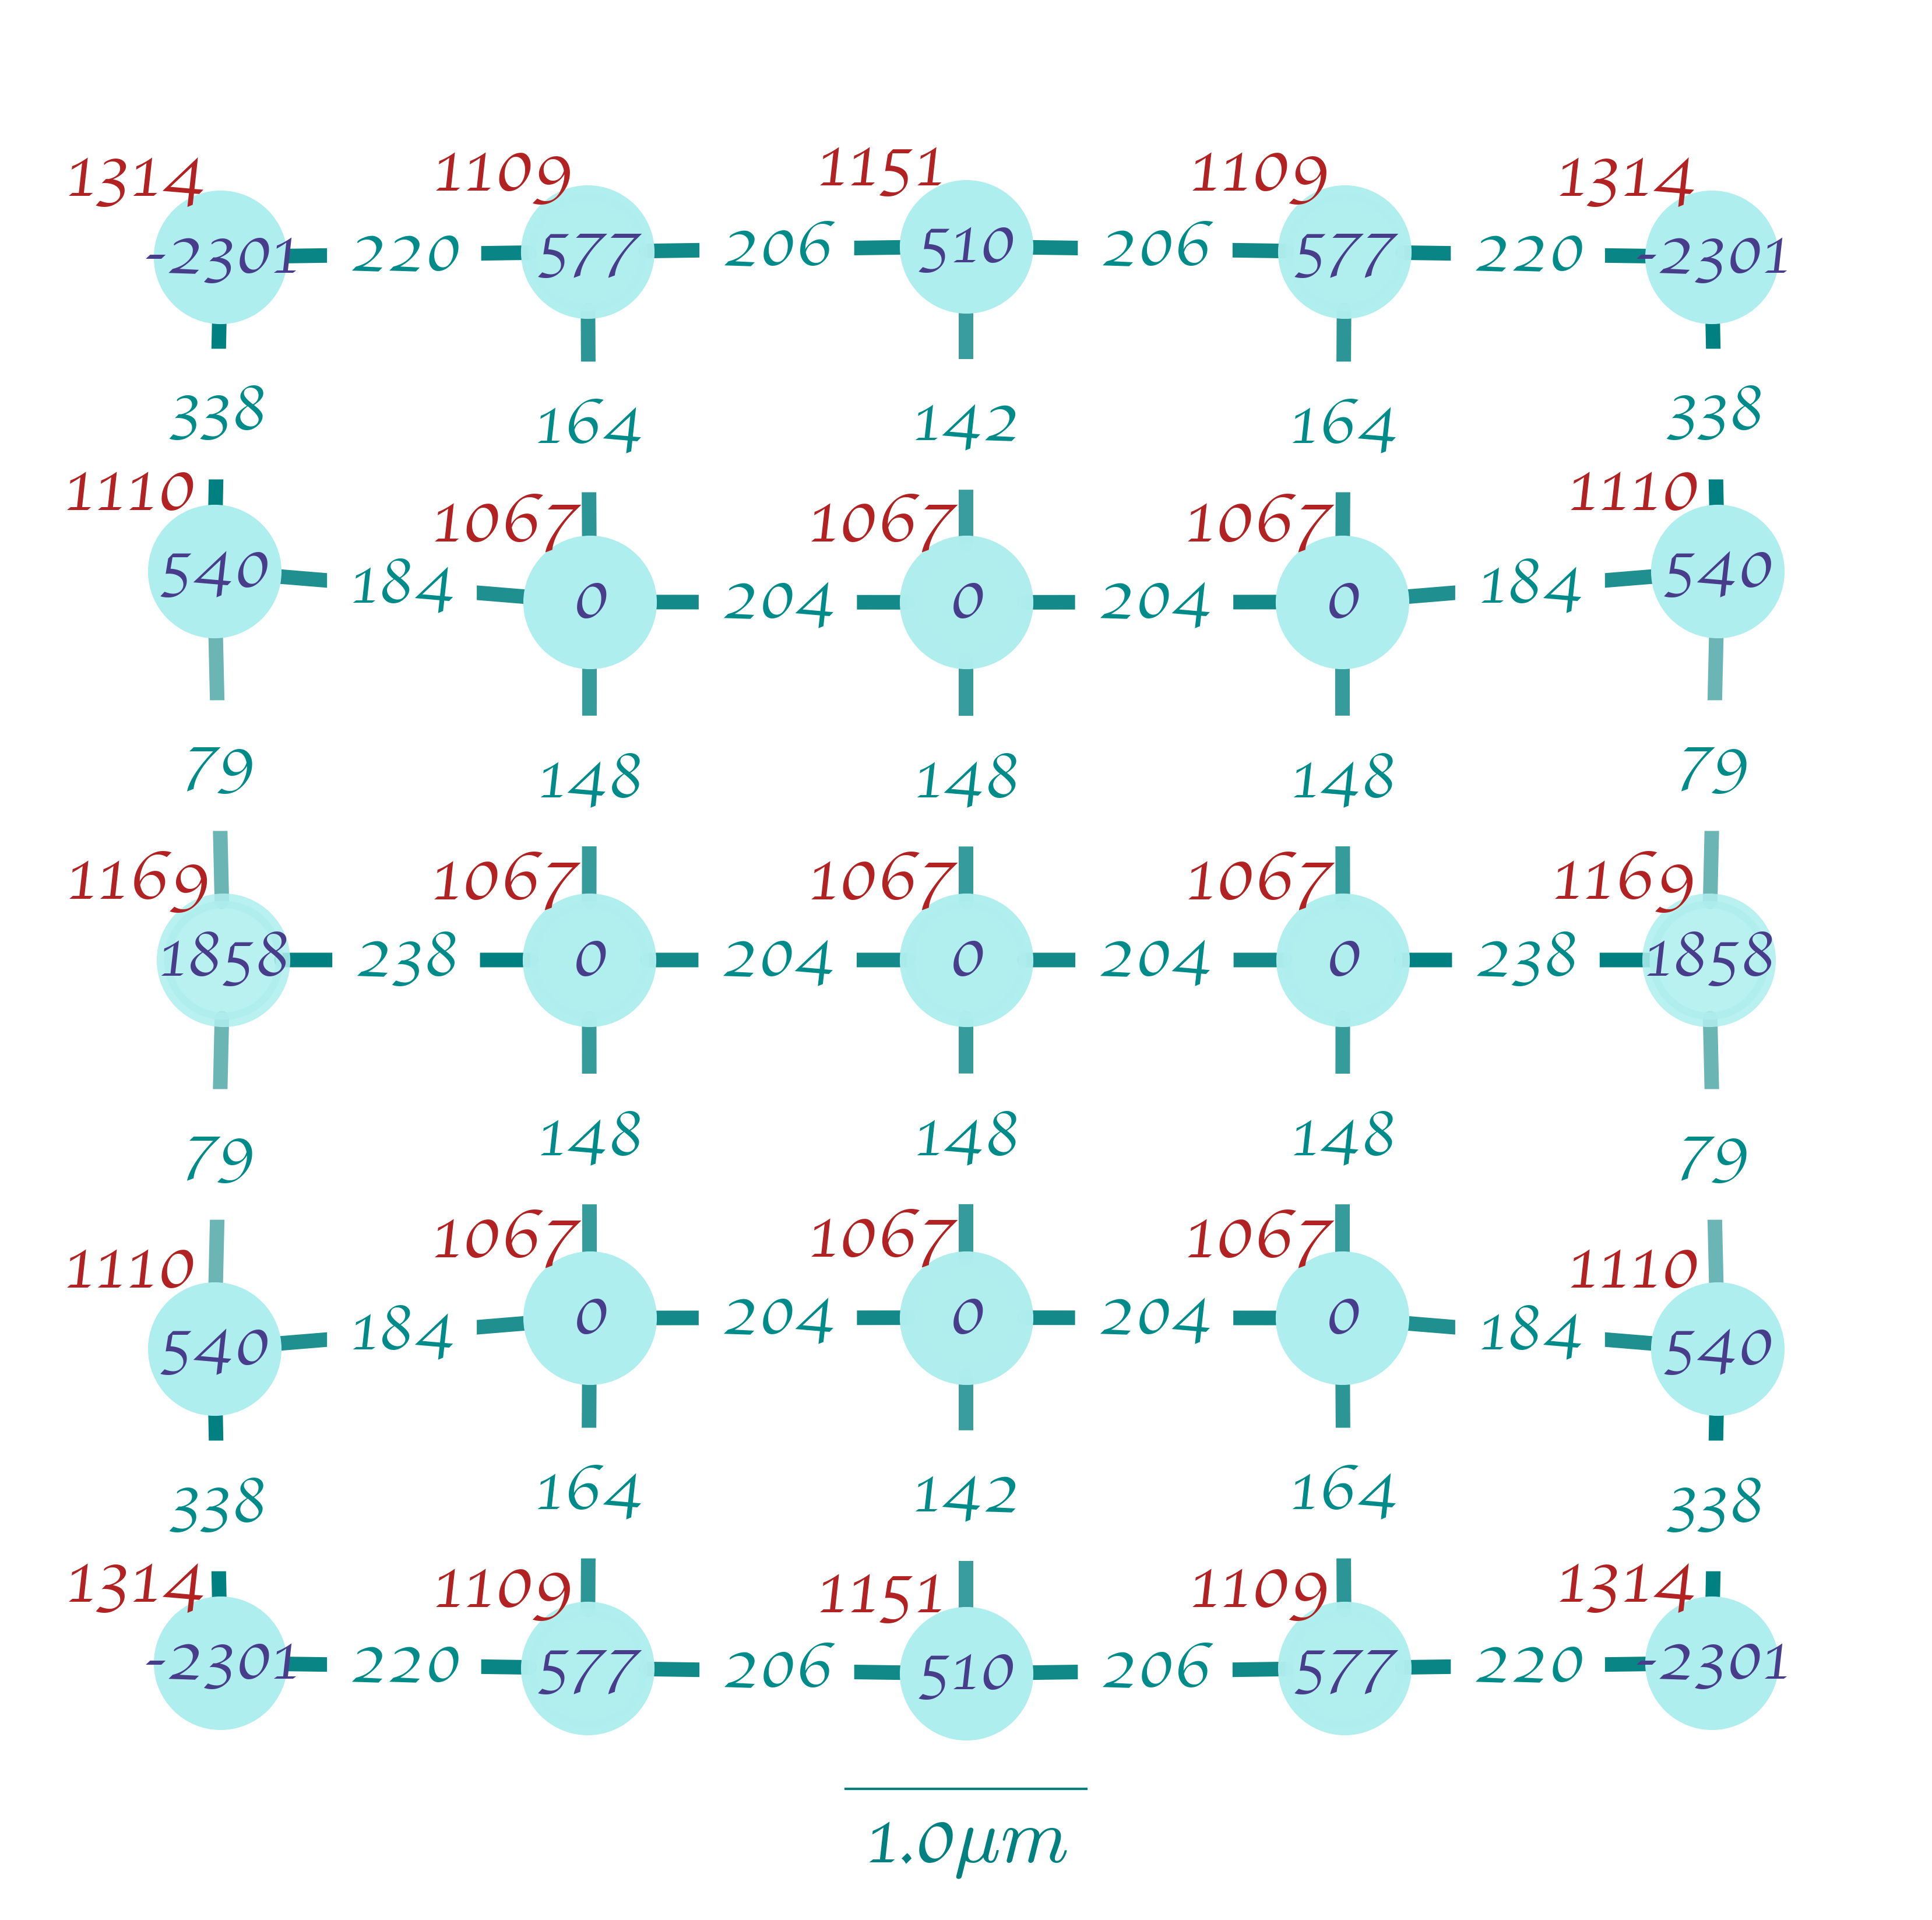

In [19]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 5
Ly = 5
d = 3
shape = "square"
w = None
eqt = "UvT"
meth = "praxis"
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(
    N,
    R0=R0,
    lattice=np.array([L, Ly], dtype=int),
    trap=(52.26, 1000),
    lc=(1550, 1600),
    ascatt=1770,
    laser=780,
    band=1,
    sparse=True,
    shape=shape,
    equalize_V0=False,
    ghost=True,
    waist=w,
    equalize=False,
    eqtarget=eqt,
    eqmethod=meth,
    symmetry=True,
    verbosity=3,
)

fn = f"../../output/Hubbard/ghost/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini"
# update_tc(fn, G)
# update_saved_data(fn, G)
G = read_file(fn, G)
G.draw_graph(nnn=False, A=G.A, U=G.U)
maskedA = G.ghost.mask_quantity(G.A)
maskedU = G.ghost.mask_quantity(G.U)
nnt = G.nn_tunneling(maskedA)
links = G.xy_links(G.ghost.links)
func = lambda x: np.max(x) - np.min(x)
tx, ty = G.txy_target(nnt, links, func)
V = np.diag(maskedA)
print("t max_err = ", max(tx, ty) * 1e-3 / G.sf)
print("V max_err = ", (np.max(V) - np.min(V)) / G.sf)
print("U max_err = ", (np.max(maskedU) - np.min(maskedU)) / G.sf)


Wannier: Number of integration grid set to 257.
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Lattice: lattice shape is square
Lattice: Full lattice sizes: [5 5]
Lattice: lattice constants: [1.55 1.6 ]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[40 41 20] is set.
DVR: R0=[6.1 6.2 7.2]w is set.
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Illegal x0 provided. Use no initial guess.

Equalize: Initial trap depths: [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Equalize: Initial trap centers:
[[-3.1  -3.2 ]
 [-3.1  -1.6 ]
 [-3.1   0.  ]
 [-1.55 -3.2 ]
 [-1.55 -1.6 ]
 [-1.55  0.  ]
 [ 0.   -3.2 ]
 [ 0.   -1.6 ]
 [ 0.    0.  ]]
Lattice: Full lattice sizes updated to: [5 5 1]
Lattice: lattice constants updated to: [1.55 1.6  1.55

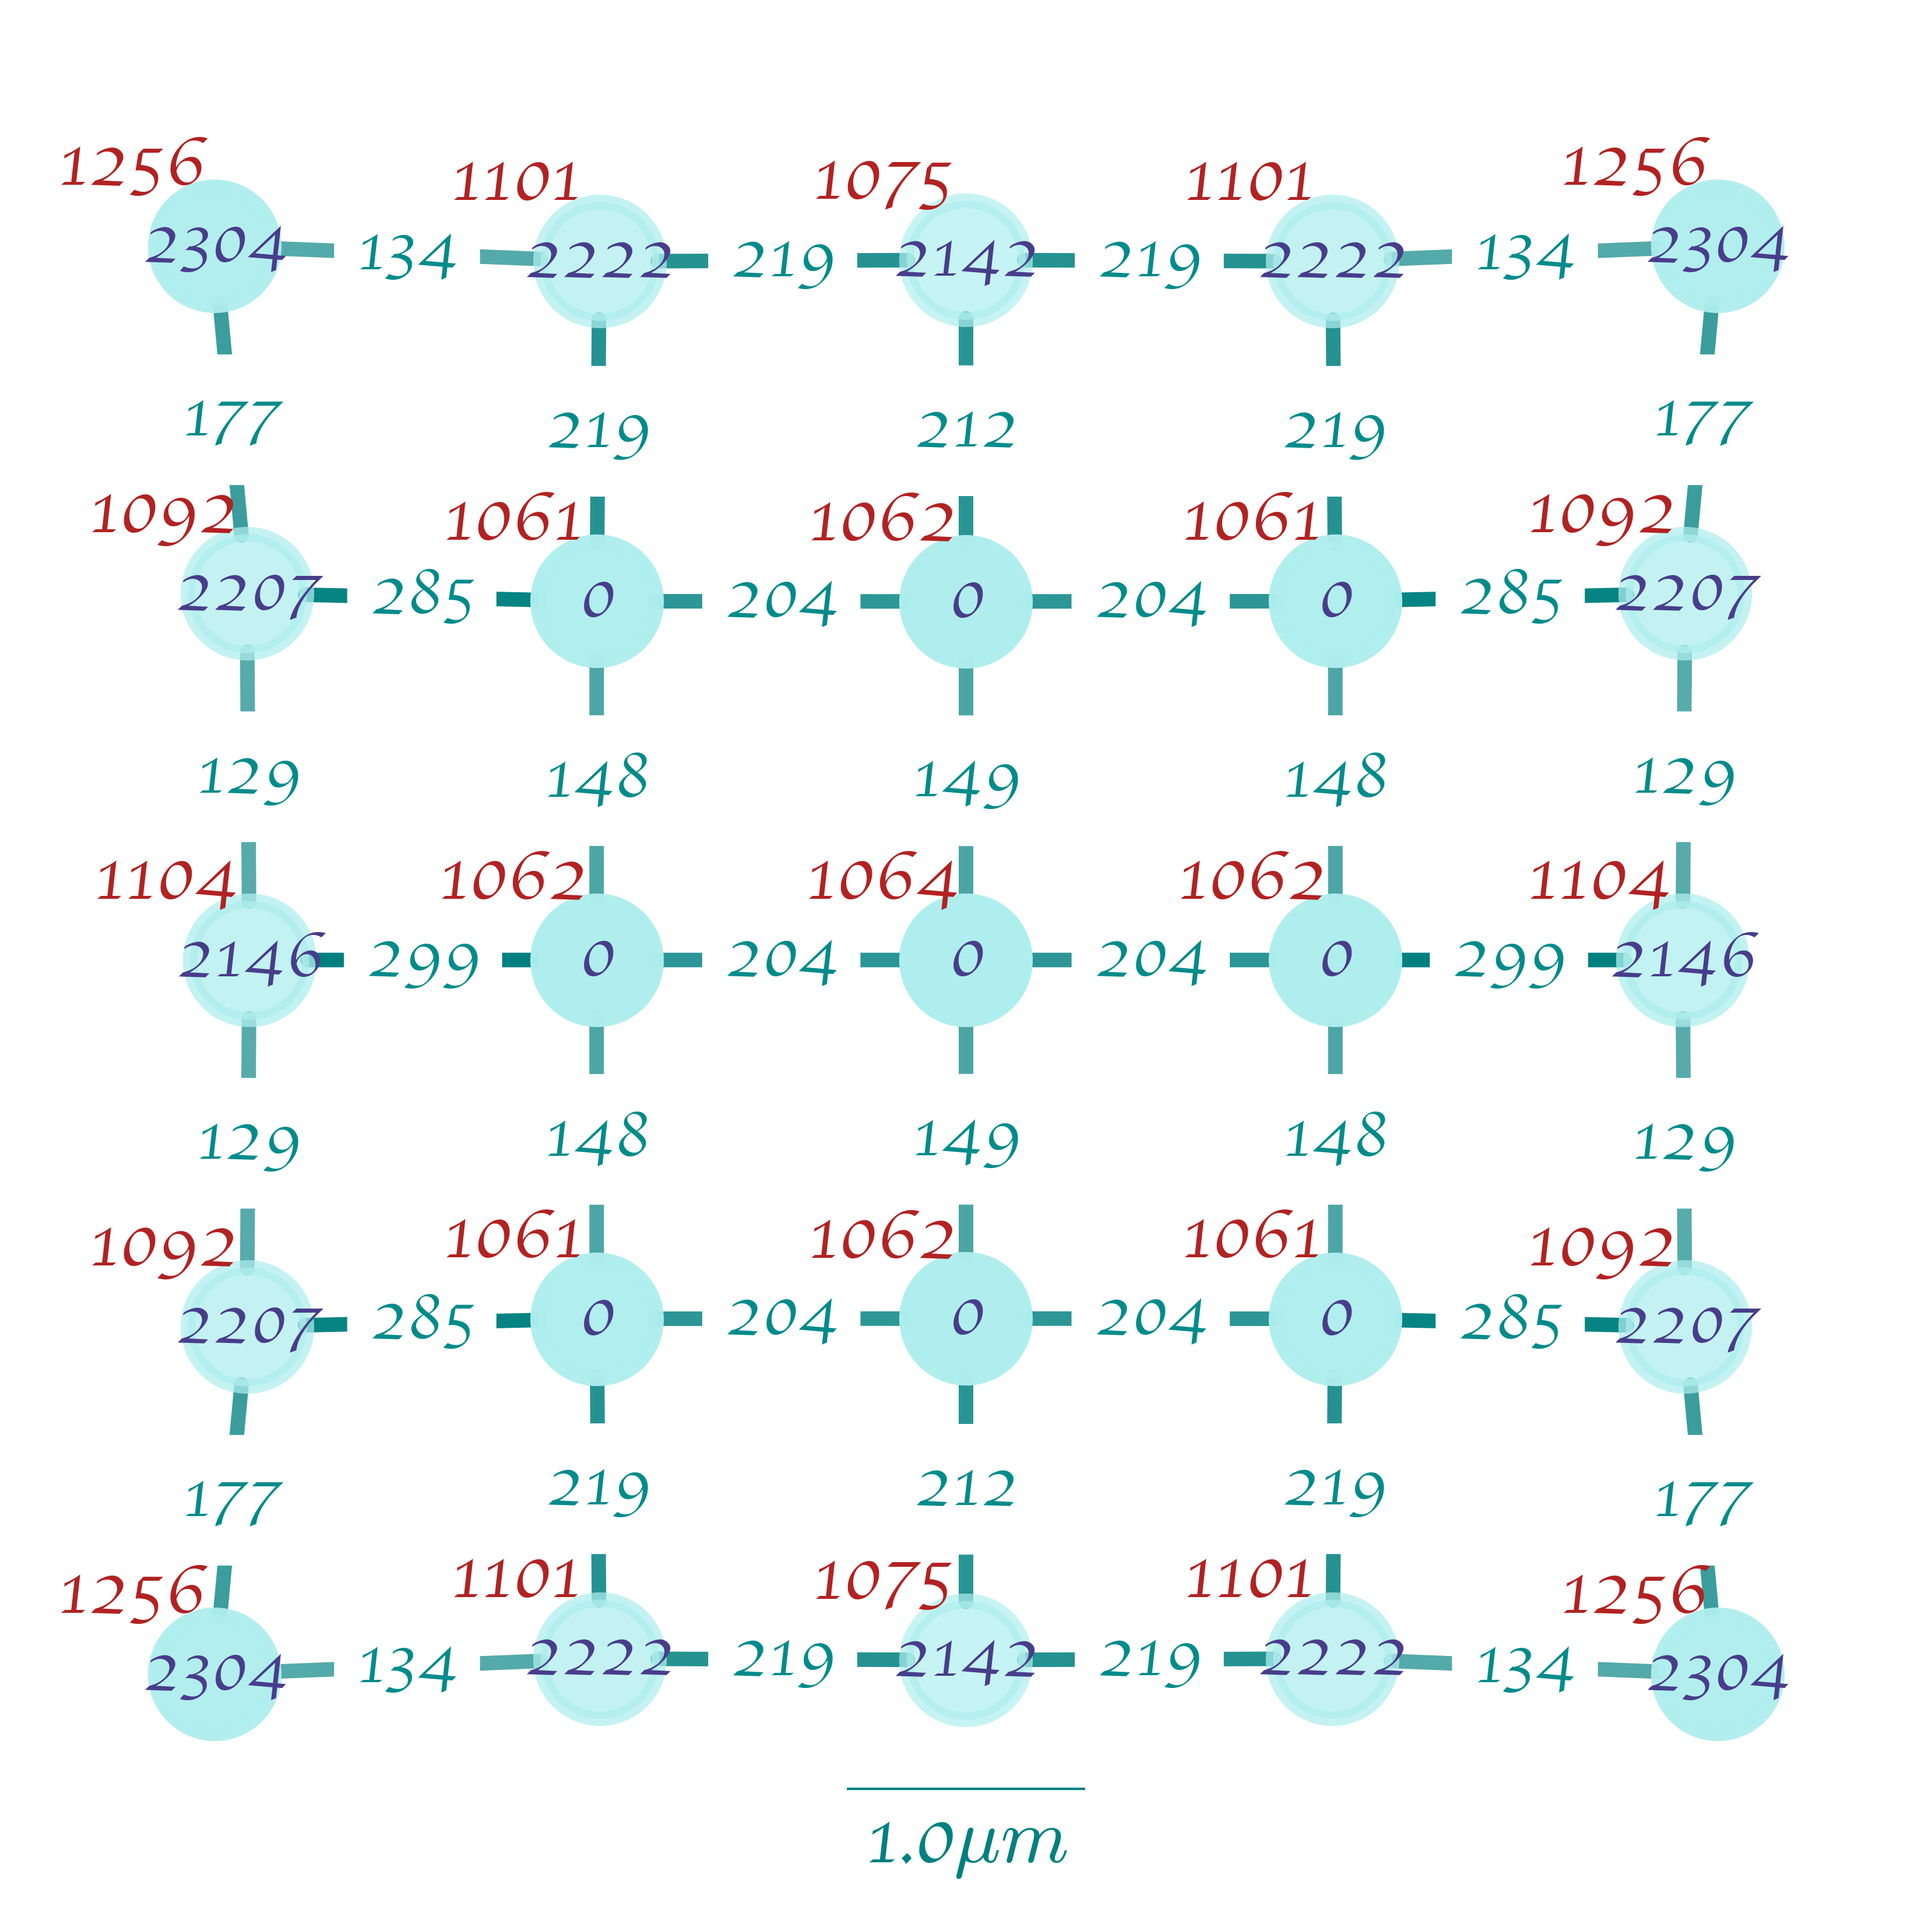

In [20]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 5
Ly = 5
d = 3
shape = "square"
w = None
eqt = "UvT"
meth = "trf"
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(
    N,
    R0=R0,
    lattice=np.array([L, Ly], dtype=int),
    trap=(52.26, 1000),
    lc=(1550, 1600),
    ascatt=1770,
    laser=780,
    band=1,
    sparse=True,
    shape=shape,
    equalize_V0=False,
    ghost=True,
    waist=w,
    equalize=False,
    eqtarget=eqt,
    eqmethod=meth,
    symmetry=True,
    verbosity=3,
)

fn = f"../../output/Hubbard/ghost_penalty_2000/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini"
# update_tc(fn, G)
# update_saved_data(fn, G)
G = read_file(fn, G)
G.draw_graph(nnn=False, A=G.A, U=G.U)
maskedA = G.ghost.mask_quantity(G.A)
maskedU = G.ghost.mask_quantity(G.U)
nnt = G.nn_tunneling(maskedA)
links = G.xy_links(G.ghost.links)
func = lambda x: np.max(x) - np.min(x)
tx, ty = G.txy_target(nnt, links, func)
V = np.diag(maskedA)
print("t max_err = ", max(tx, ty) * 1e-3 / G.sf)
print("V max_err = ", (np.max(V) - np.min(V)) / G.sf)
print("U max_err = ", (np.max(maskedU) - np.min(maskedU)) / G.sf)


## 2D Lieb

Wannier: Number of integration grid set to 257.
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Lattice: lattice shape is square
Lattice: Full lattice sizes: [5 5]
Lattice: lattice constants: [1.55 1.6 ]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[40 41 20] is set.
DVR: R0=[6.1 6.2 7.2]w is set.
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Illegal x0 provided. Use no initial guess.

Equalize: Initial trap depths: [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Equalize: Initial trap centers:
[[-3.1  -3.2 ]
 [-3.1  -1.6 ]
 [-3.1   0.  ]
 [-1.55 -3.2 ]
 [-1.55 -1.6 ]
 [-1.55  0.  ]
 [ 0.   -3.2 ]
 [ 0.   -1.6 ]
 [ 0.    0.  ]]
Lattice: Full lattice sizes updated to: [5 5 1]
Lattice: lattice constants updated to: [1.55 1.6  1.55

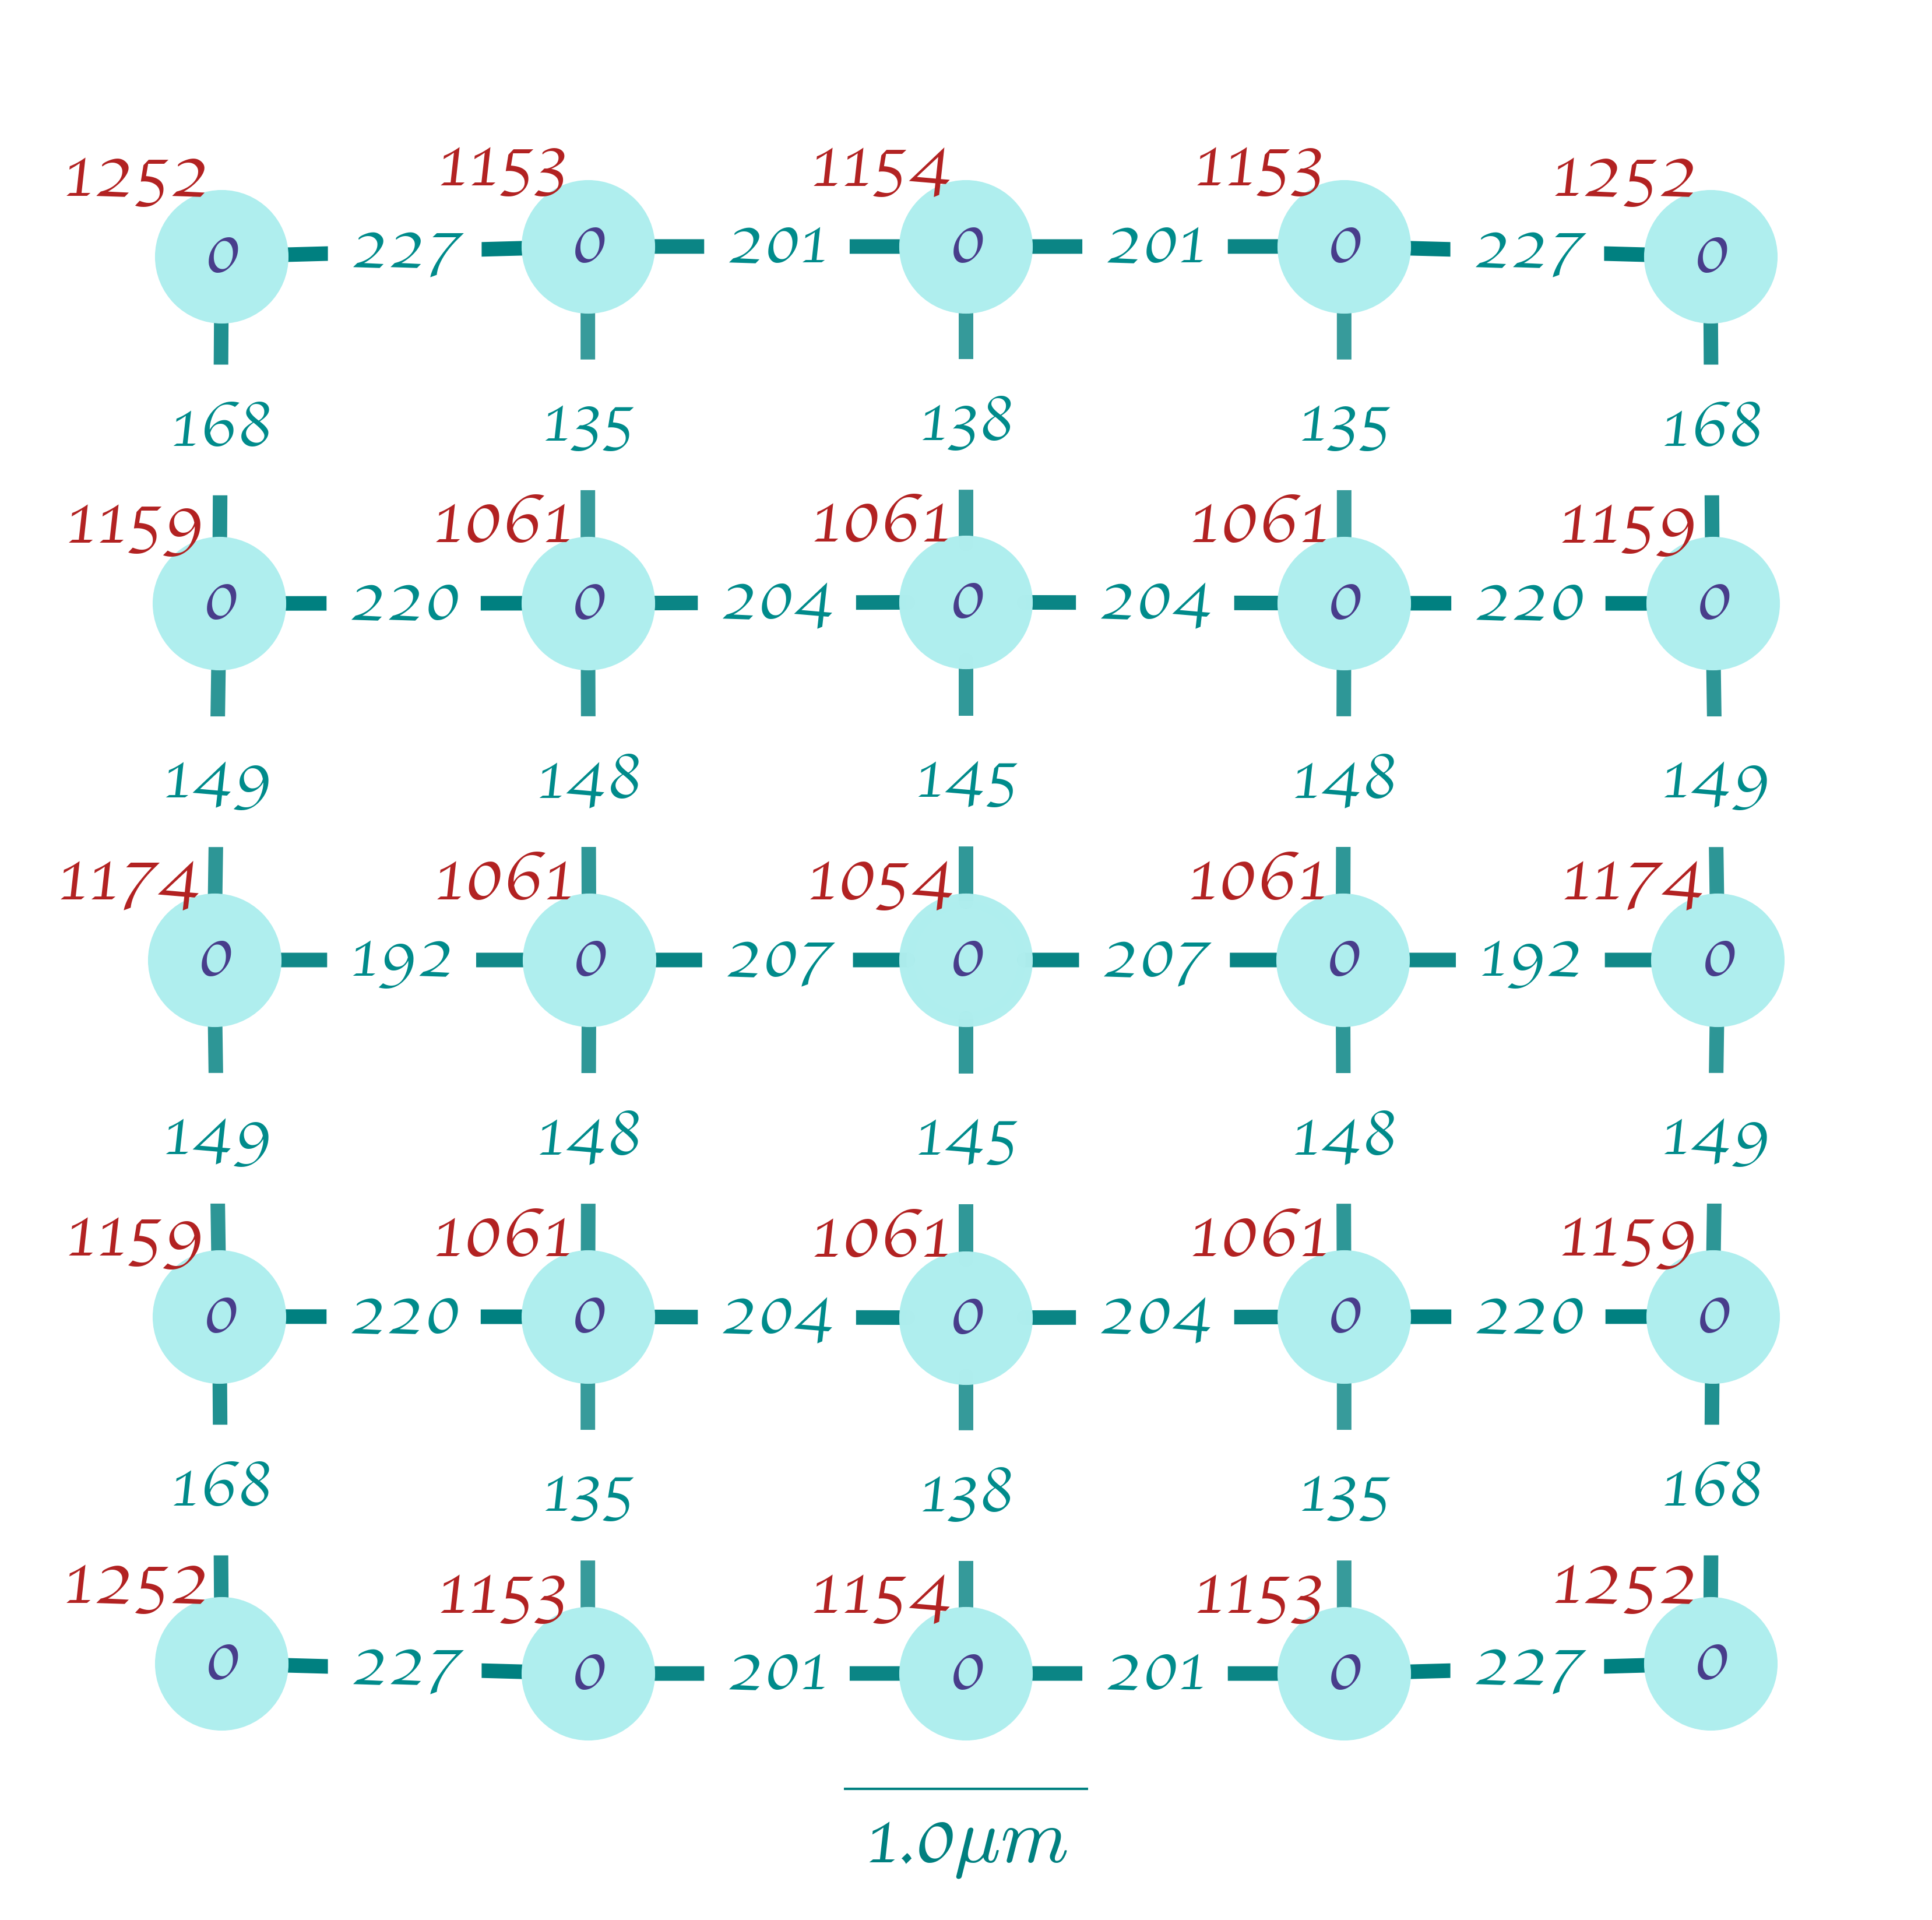

In [24]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 5
Ly = 5
d = 3
shape = "Lieb"
w = None
eqt = "UvT"
meth = "trf"
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(
    N,
    R0=R0,
    lattice=np.array([L, Ly], dtype=int),
    trap=(52.26, 1000),
    lc=(1550, 1600),
    ascatt=1770,
    laser=780,
    band=1,
    sparse=True,
    shape="square",
    waist=w,
    equalize=False,
    equalize_V0=False,
    eqtarget=eqt,
    eqmethod=meth,
    ghost=True,
    symmetry=True,
    verbosity=3,
)

fn = f"../../output/Hubbard/ghost/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini"
# update_tc(fn, G)
# update_saved_data(fn, G)
G = read_file(fn, G)
G.draw_graph(nnn=False, A=G.A, U=G.U)
maskedA = G.ghost.mask_quantity(G.A)
maskedU = G.ghost.mask_quantity(G.U)
nnt = G.nn_tunneling(maskedA)
links = G.xy_links(G.ghost.links)
func = lambda x: np.max(x) - np.min(x)
tx, ty = G.txy_target(nnt, links, func)
V = np.diag(maskedA)
print("t max_err = ", max(tx, ty) * 1e-3 / G.sf)
print("V max_err = ", (np.max(V) - np.min(V)) / G.sf)
print("U max_err = ", (np.max(maskedU) - np.min(maskedU)) / G.sf)


Wannier: Number of integration grid set to 257.
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Lattice: lattice shape is square
Lattice: Full lattice sizes: [5 5]
Lattice: lattice constants: [1.55 1.6 ]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[40 41 20] is set.
DVR: R0=[6.1 6.2 7.2]w is set.
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Illegal x0 provided. Use no initial guess.

Equalize: Initial trap depths: [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Equalize: Initial trap centers:
[[-3.1  -3.2 ]
 [-3.1  -1.6 ]
 [-3.1   0.  ]
 [-1.55 -3.2 ]
 [-1.55 -1.6 ]
 [-1.55  0.  ]
 [ 0.   -3.2 ]
 [ 0.   -1.6 ]
 [ 0.    0.  ]]
Lattice: Full lattice sizes updated to: [5 5 1]
Lattice: lattice constants updated to: [1.55 1.6  1.55

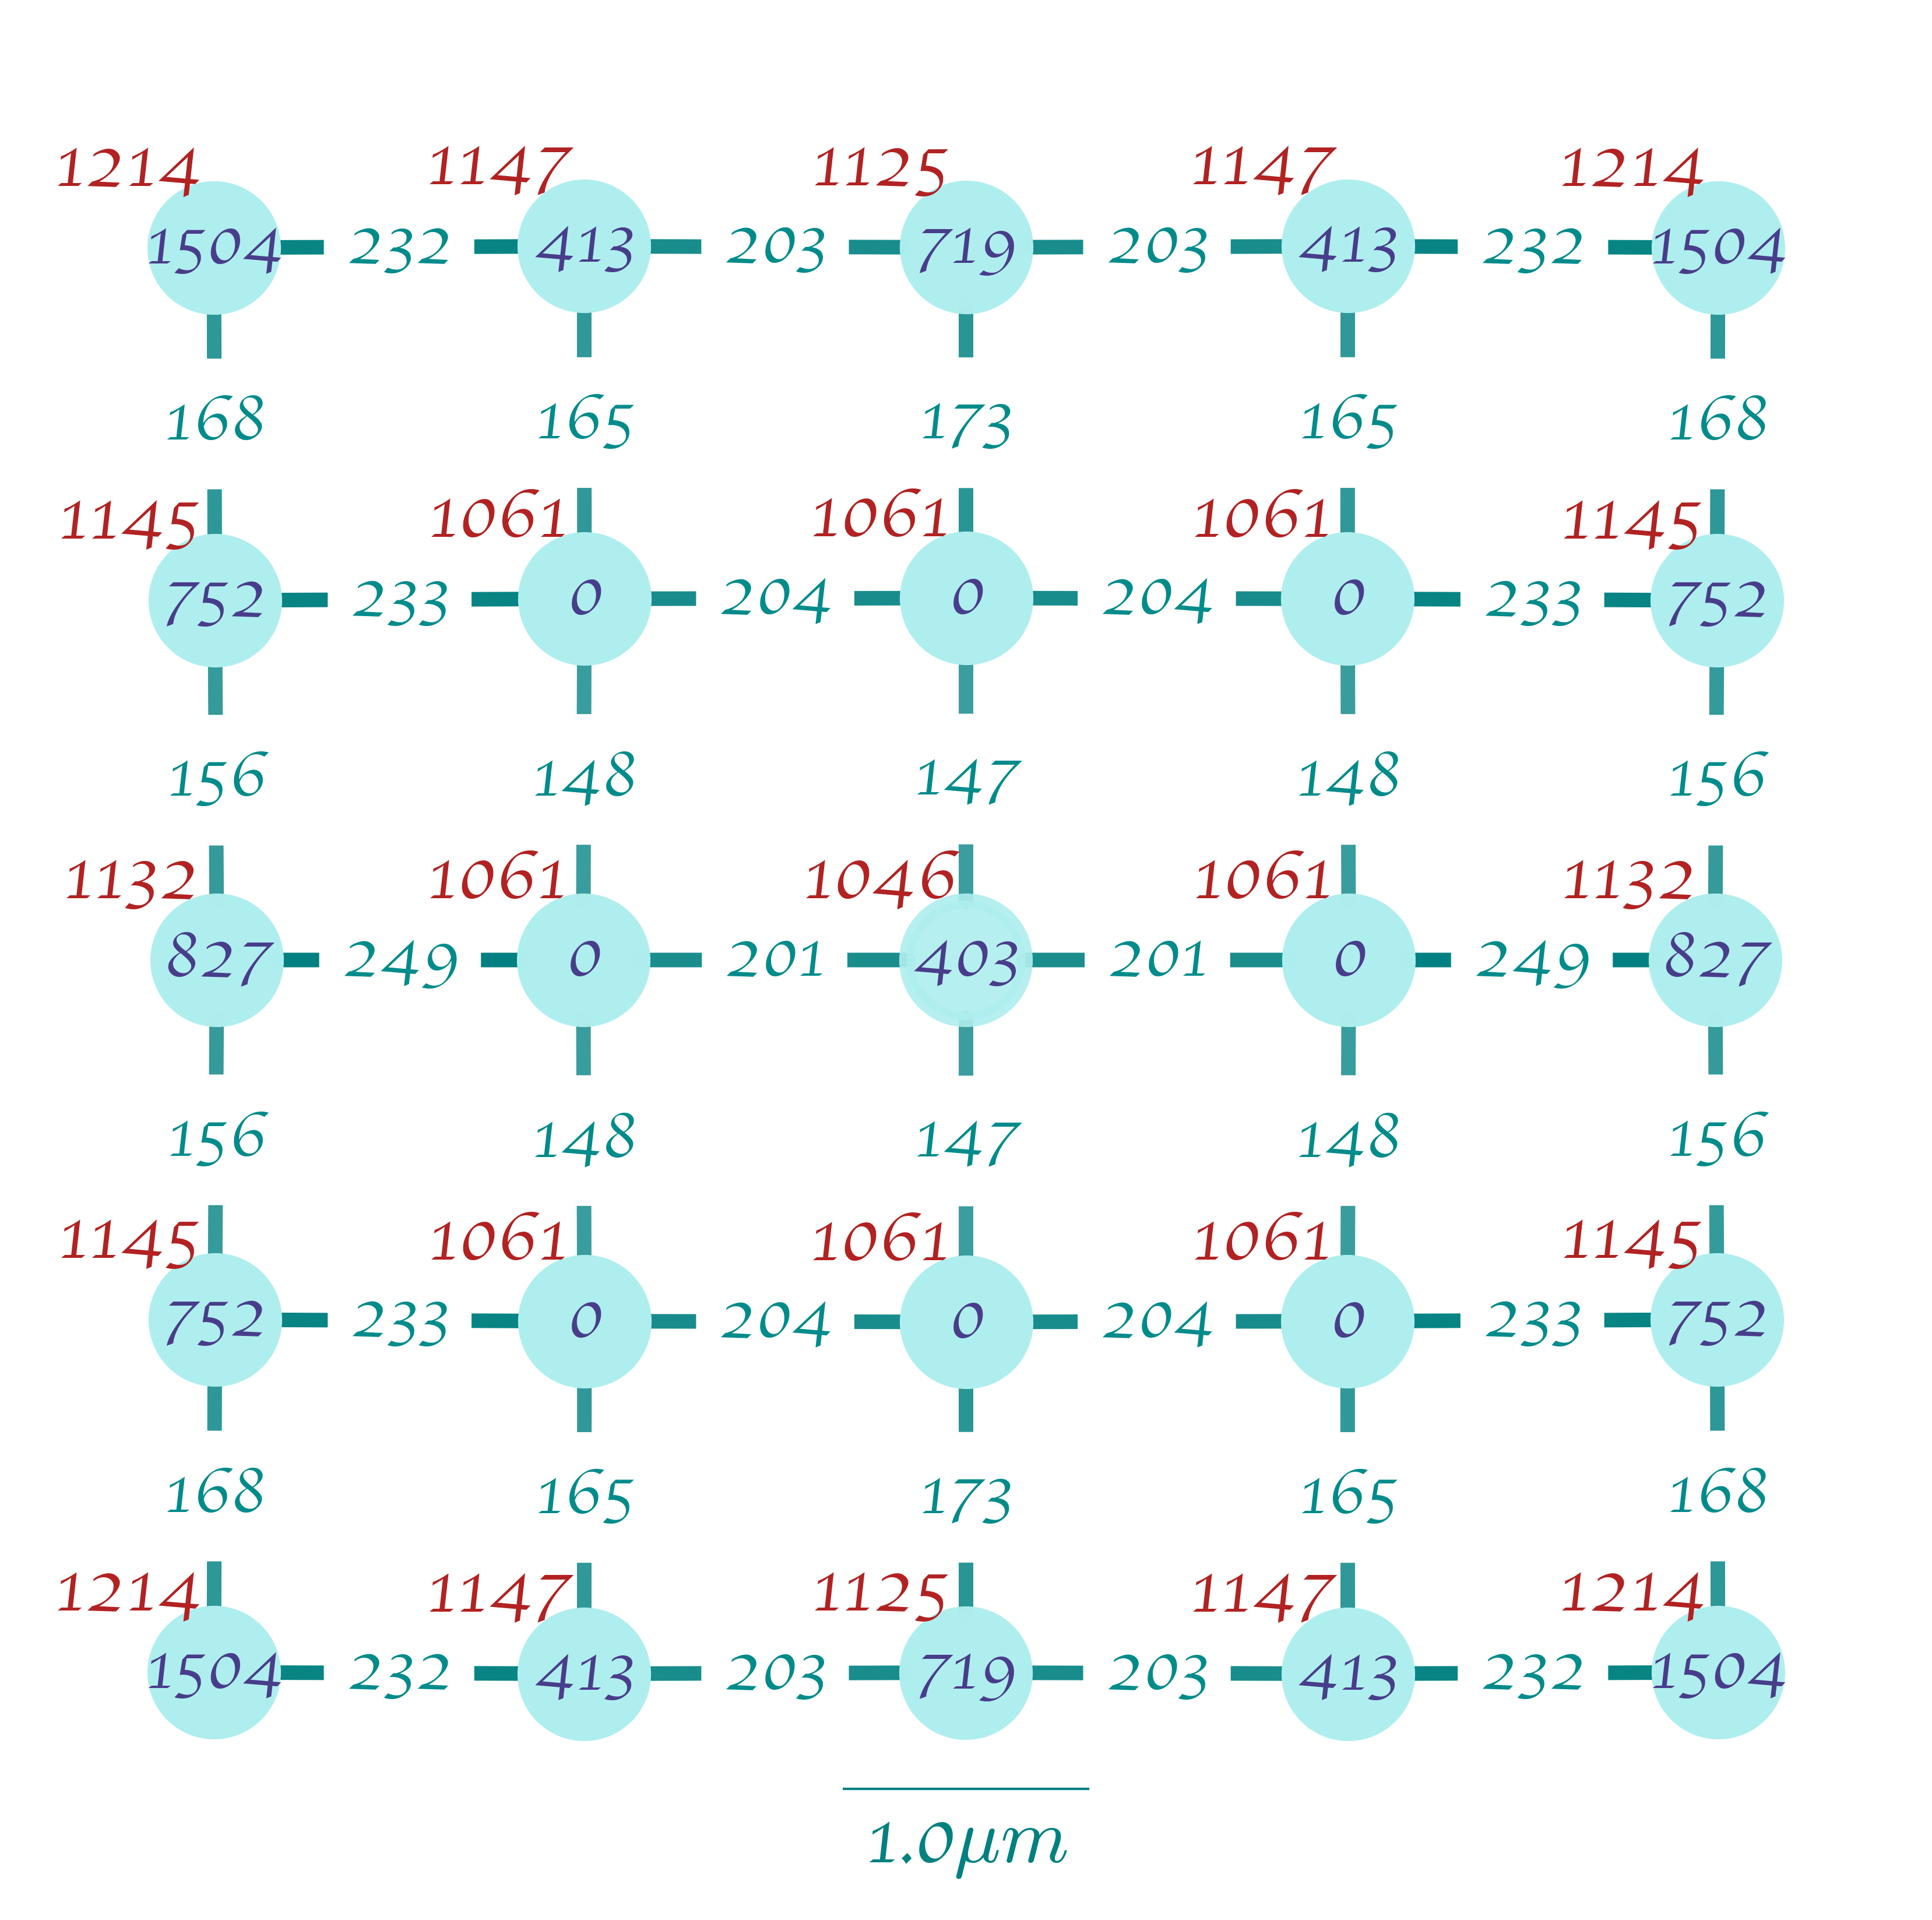

In [25]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 5
Ly = 5
d = 3
shape = "Lieb"
w = None
eqt = "UvT"
meth = "trf"
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(
    N,
    R0=R0,
    lattice=np.array([L, Ly], dtype=int),
    trap=(52.26, 1000),
    lc=(1550, 1600),
    ascatt=1770,
    laser=780,
    band=1,
    sparse=True,
    shape="square",
    waist=w,
    equalize=False,
    equalize_V0=False,
    eqtarget=eqt,
    eqmethod=meth,
    ghost=True,
    symmetry=True,
    verbosity=3,
)

fn = (
    f"../../output/Hubbard/ghost_penalty_400/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini"
)
# update_tc(fn, G)
# update_saved_data(fn, G)
G = read_file(fn, G)
G.draw_graph(nnn=False, A=G.A, U=G.U)

Equalize: Lieb lattice ghost sites.
Set shape to square for total system.
Wannier: Number of integration grid set to 257.
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Lattice: lattice shape is square
Lattice: Full lattice sizes: [5 5]
Lattice: lattice constants: [1.55 1.6 ]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[40 41 20] is set.
DVR: R0=[6.1 6.2 7.2]w is set.
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Illegal x0 provided. Use no initial guess.

Equalize: Initial trap depths: [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Equalize: Initial trap centers:
[[-3.1  -3.2 ]
 [-3.1  -1.6 ]
 [-3.1   0.  ]
 [-1.55 -3.2 ]
 [-1.55 -1.6 ]
 [-1.55  0.  ]
 [ 0.   -3.2 ]
 [ 0.   -1.6 ]
 [ 0.    0.  ]]
Lattice: Full lattice sizes 

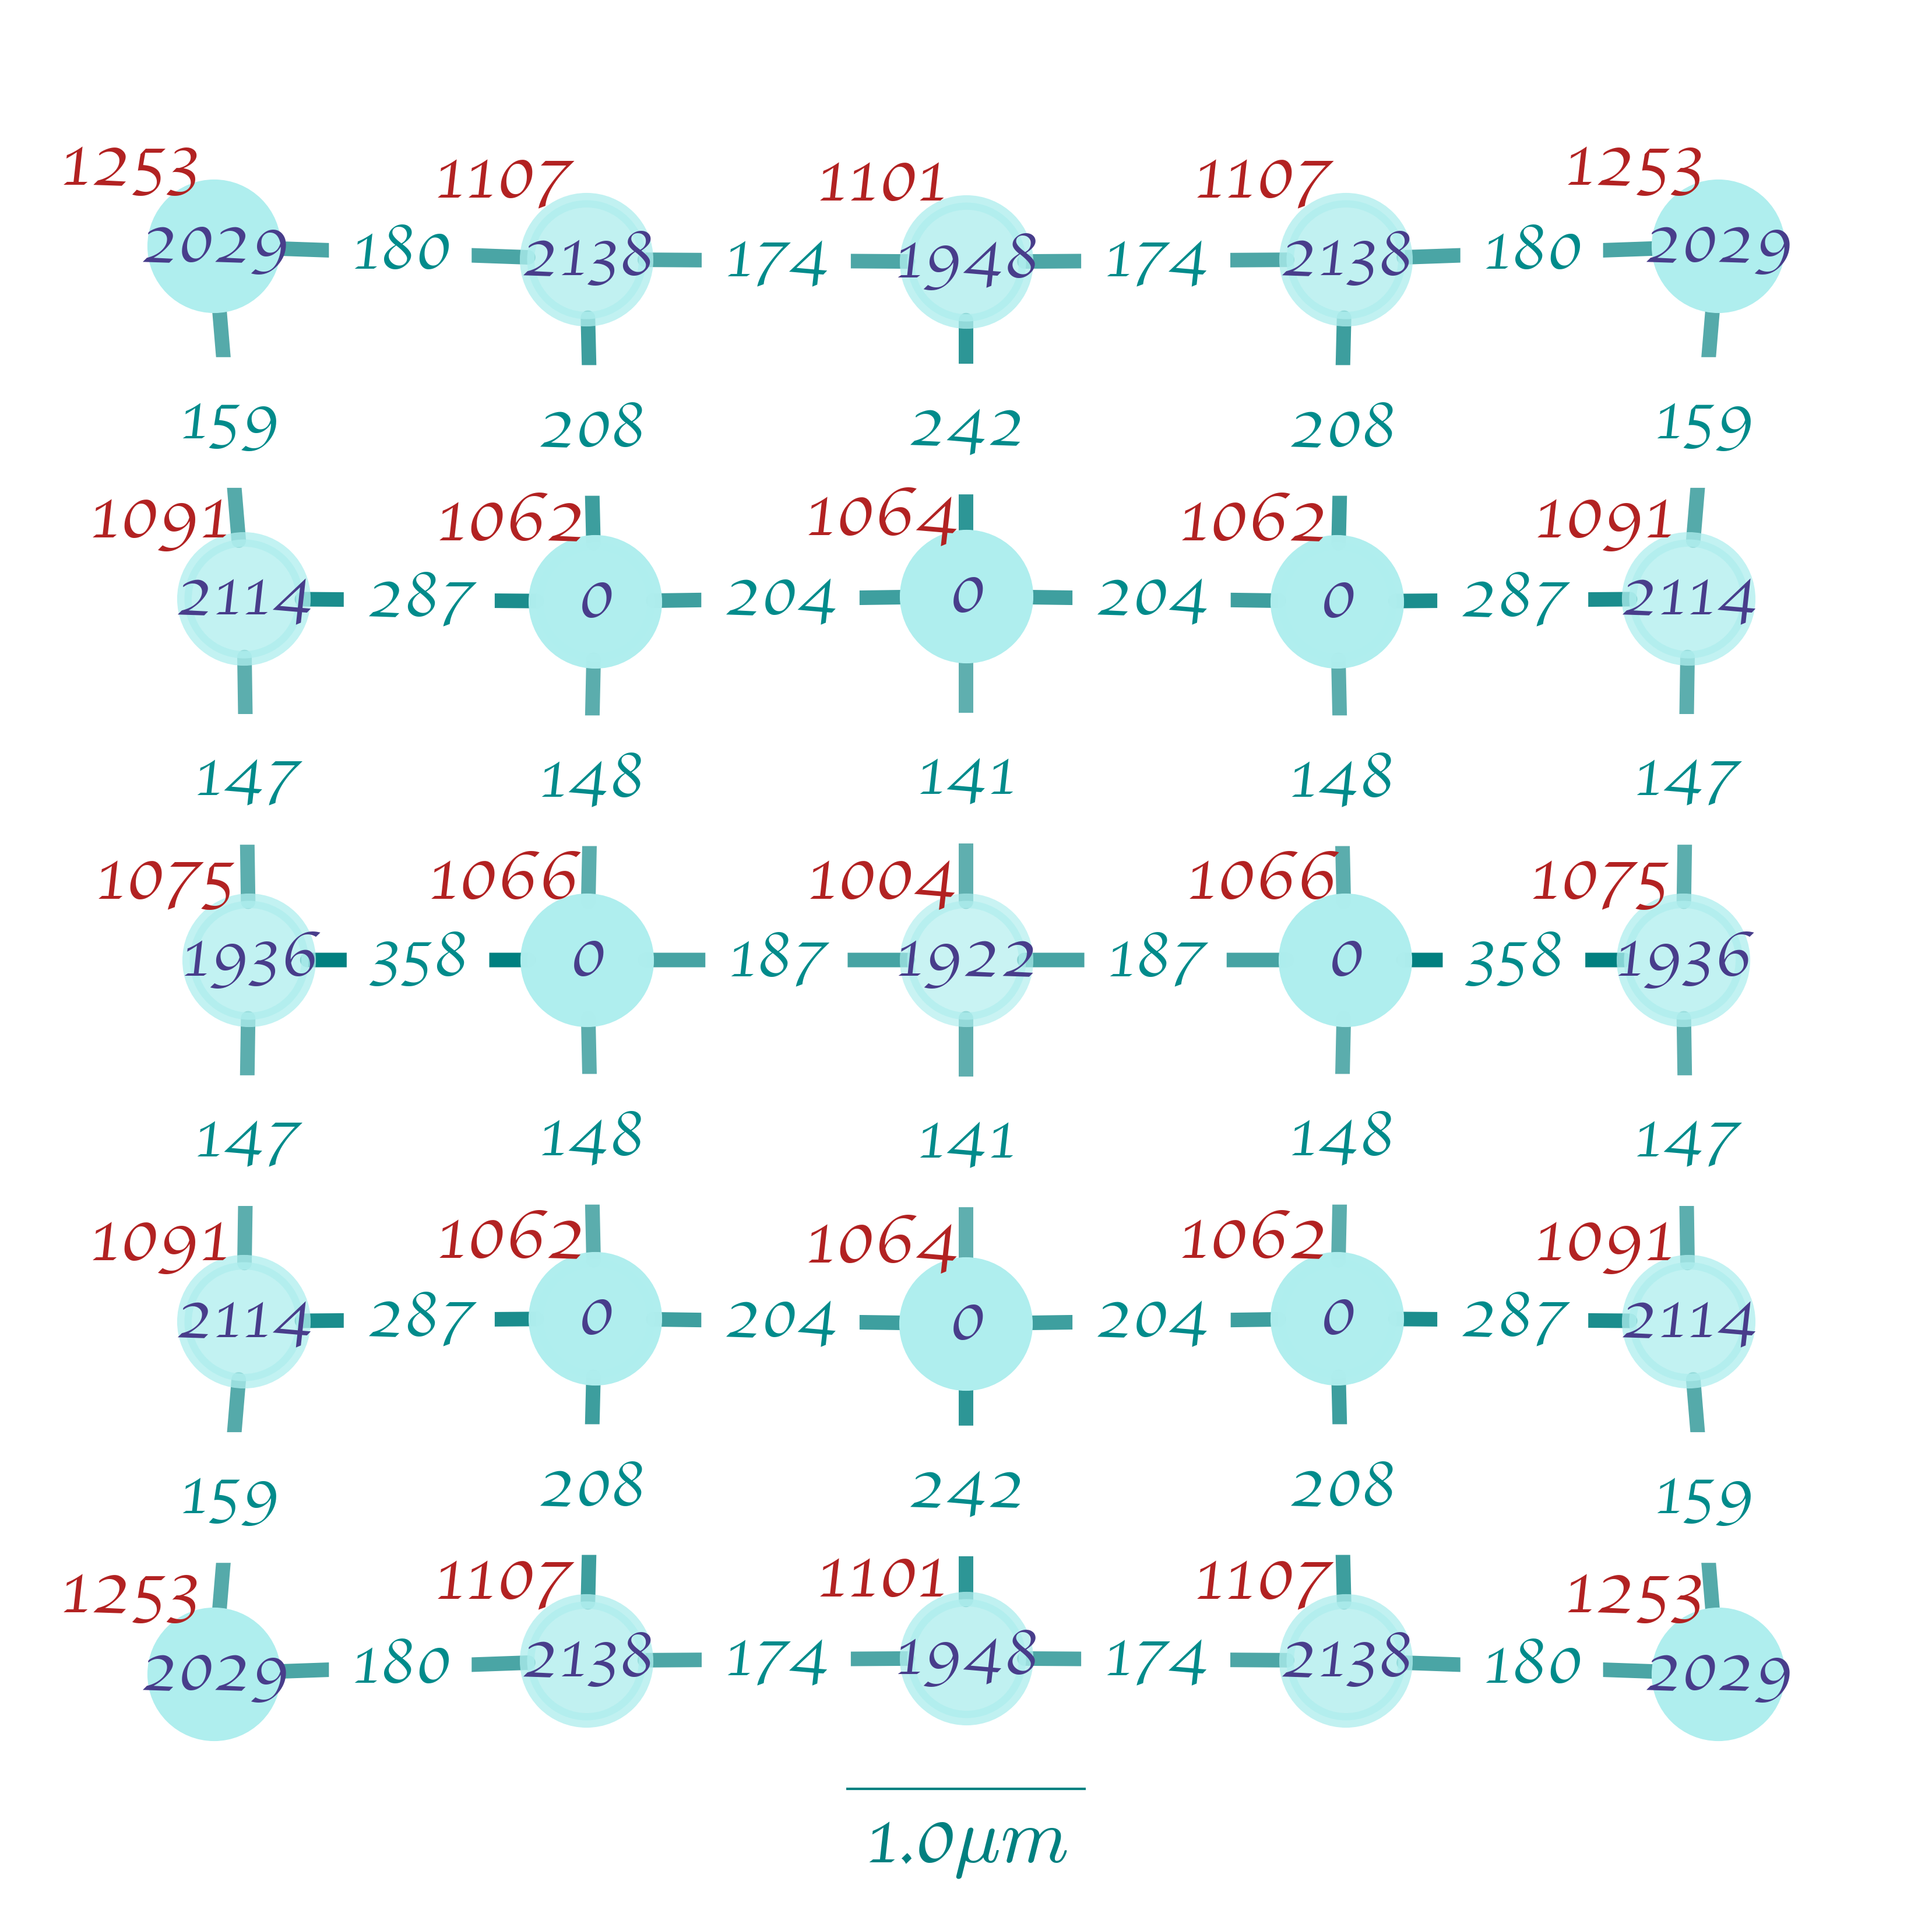

In [29]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 5
Ly = 5
d = 3
shape = "Lieb"
w = None
eqt = "UvT"
meth = "trf"
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(
    N,
    R0=R0,
    lattice=np.array([L, Ly], dtype=int),
    trap=(52.26, 1000),
    lc=(1550, 1600),
    ascatt=1770,
    laser=780,
    band=1,
    sparse=True,
    shape="Lieb",
    waist=w,
    equalize=False,
    equalize_V0=False,
    eqtarget=eqt,
    eqmethod=meth,
    ghost=True,
    symmetry=True,
    verbosity=3,
)

fn = f"../../output/Hubbard/ghost_penalty_2000/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}.ini"
# update_tc(fn, G)
# update_saved_data(fn, G)
G = read_file(fn, G)
G.draw_graph(nnn=False, A=G.A, U=G.U)

Equalize: Lieb lattice ghost sites.
Set shape to square for total system.
Wannier: Number of integration grid set to 257.
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=52.26kHz w=1000nm
Lattice: lattice shape is square; lattice constants set to: (1550, 1600)
Lattice: lattice shape is square
Lattice: Full lattice sizes: [5 5]
Lattice: lattice constants: [1.55 1.6 ]w
Lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[40 41 20] is set.
DVR: R0=[6.1 6.2 7.2]w is set.
Equalize: scale_factor is not a number. Set to None.
Equalize: ghost sites are set.
Illegal x0 provided. Use no initial guess.

Equalize: Initial trap depths: [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Equalize: Initial trap centers:
[[-3.1  -3.2 ]
 [-3.1  -1.6 ]
 [-3.1   0.  ]
 [-1.55 -3.2 ]
 [-1.55 -1.6 ]
 [-1.55  0.  ]
 [ 0.   -3.2 ]
 [ 0.   -1.6 ]
 [ 0.    0.  ]]
Lattice: Full lattice sizes 

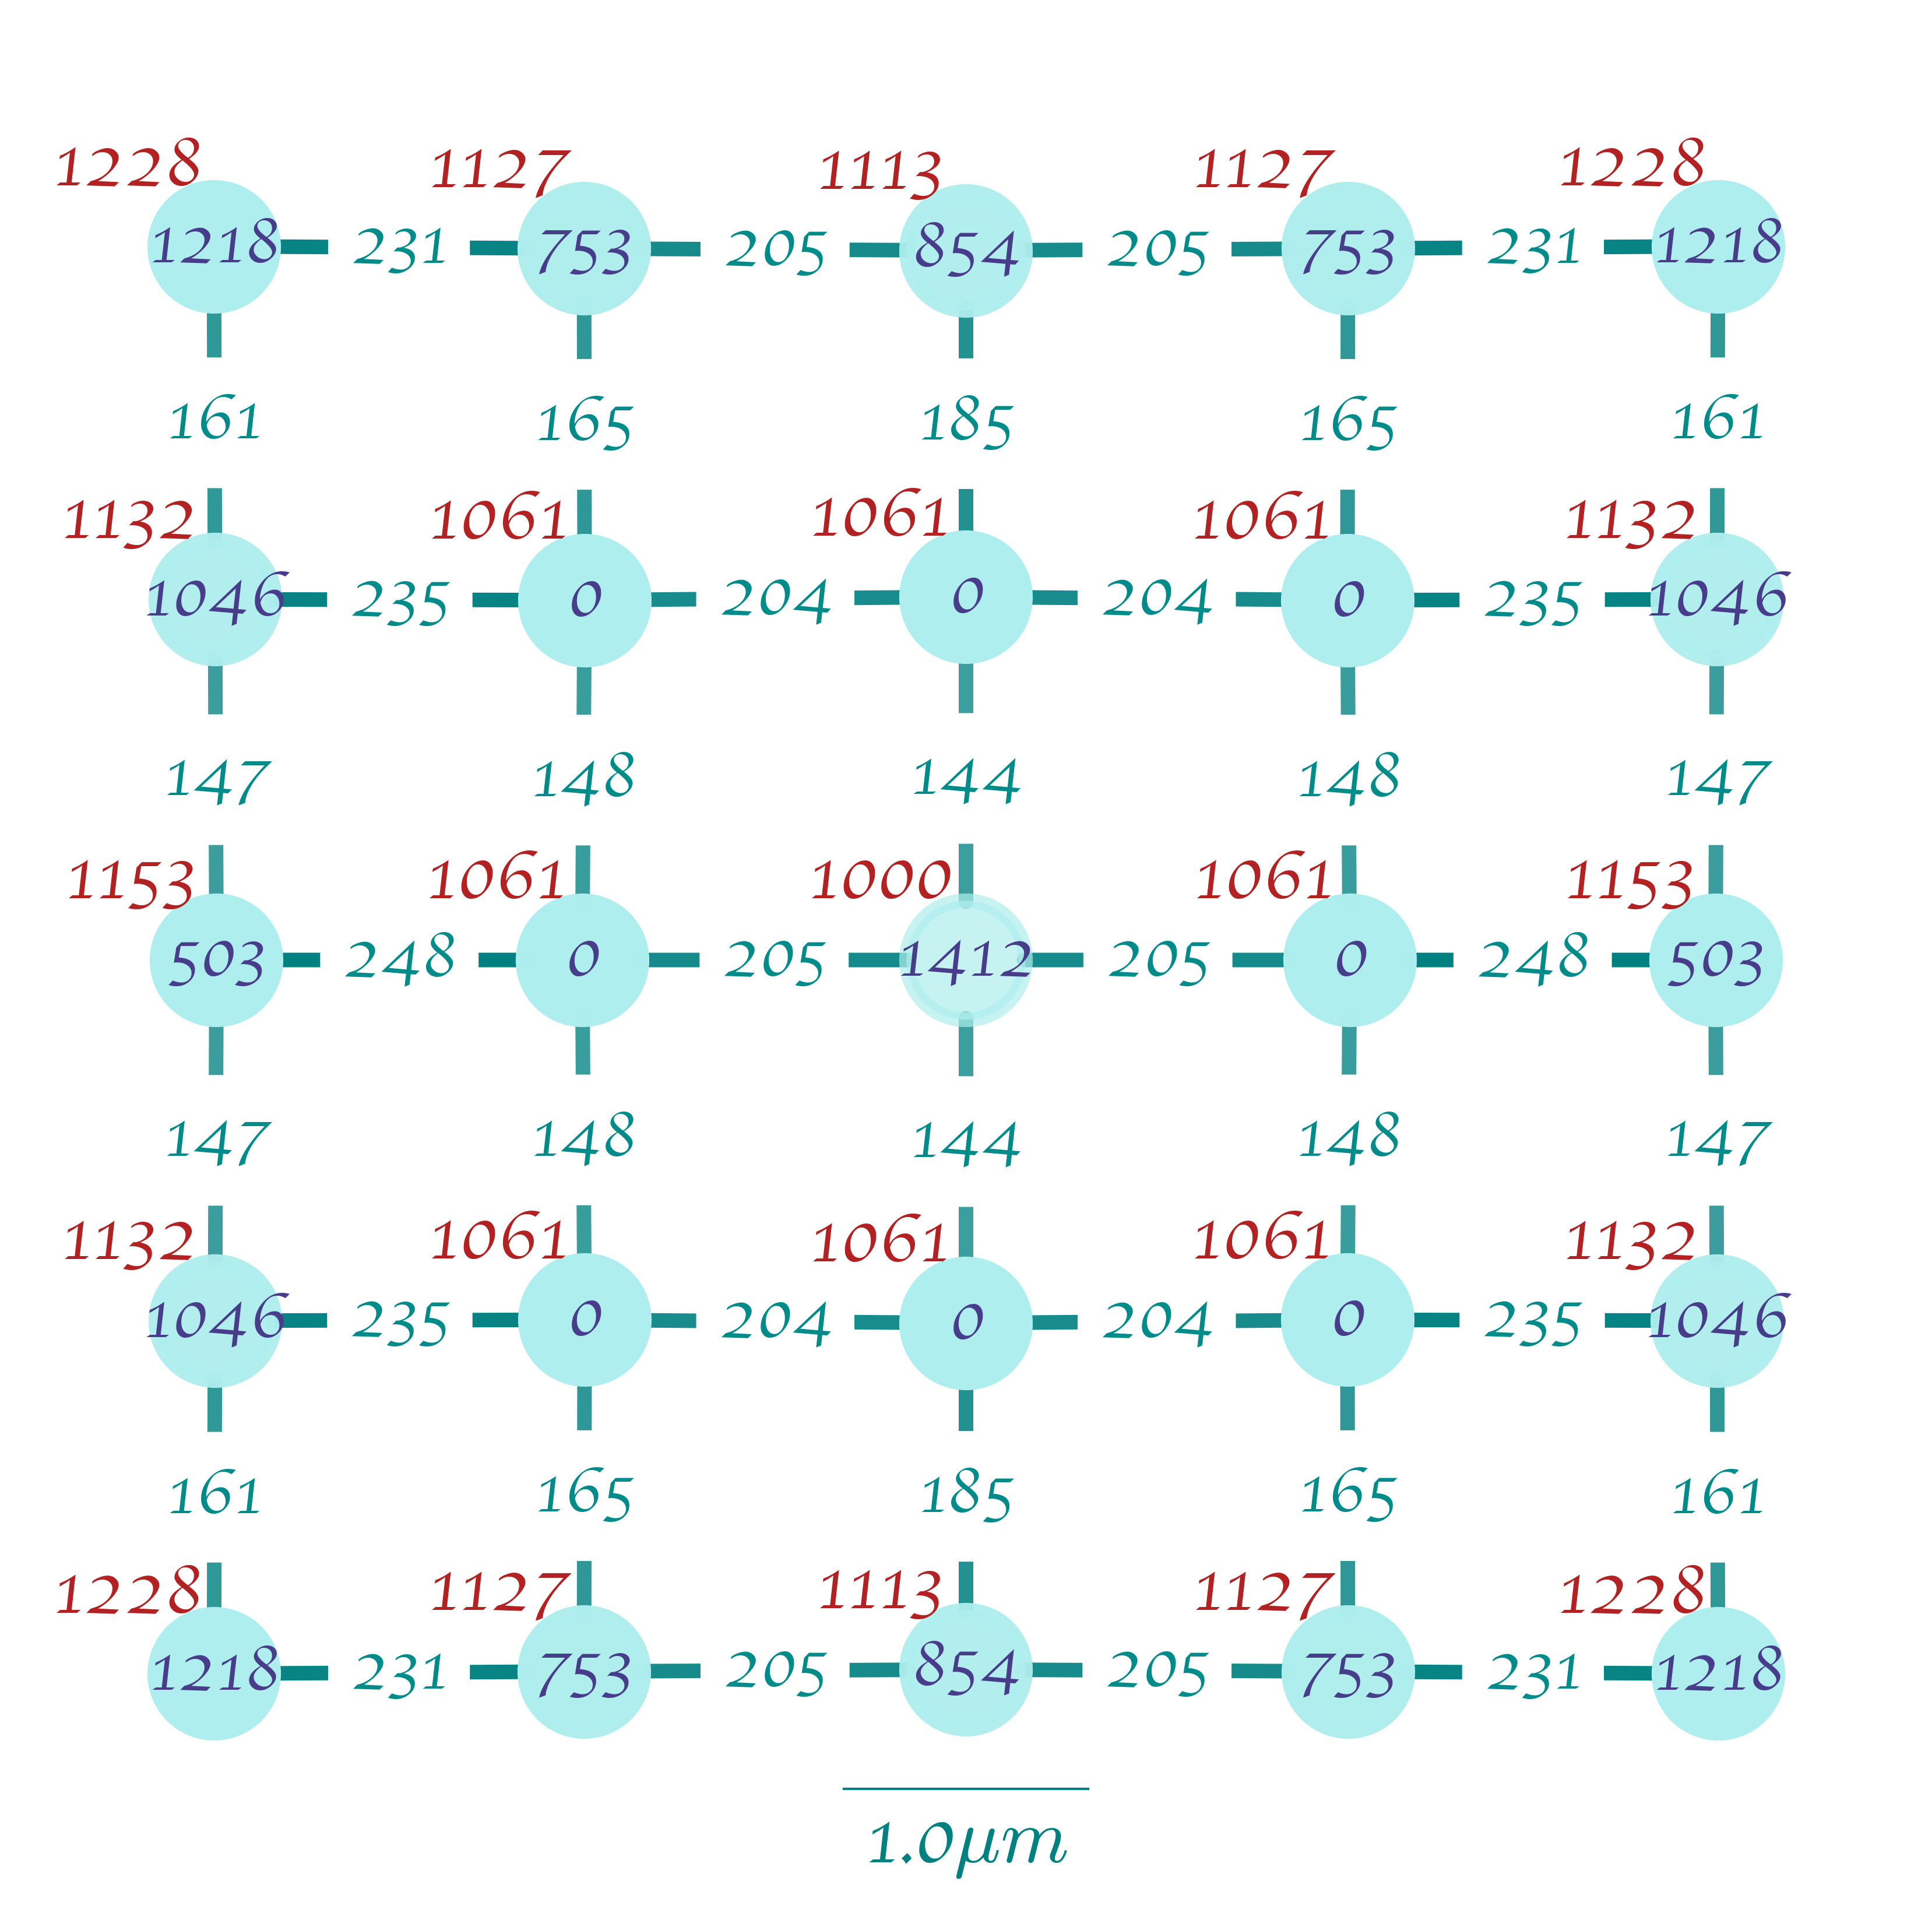

In [28]:
from HubbardTweezer.Hubbard.plot import *
import numpy as np
from HubbardTweezer.Hubbard.io import *

N = 20
L = 5
Ly = 5
d = 3
shape = "Lieb"
w = None
eqt = "UvT"
meth = "trf"
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(
    N,
    R0=R0,
    lattice=np.array([L, Ly], dtype=int),
    trap=(52.26, 1000),
    lc=(1550, 1600),
    ascatt=1770,
    laser=780,
    band=1,
    sparse=True,
    shape="Lieb",
    waist=w,
    equalize=False,
    equalize_V0=False,
    eqtarget=eqt,
    eqmethod=meth,
    ghost=True,
    symmetry=True,
    verbosity=3,
)

fn = f"../../output/Hubbard/ghost_penalty_2000/{d}D_{L}x{Ly}_{shape}_{w}_{eqt}_{meth}_modinit.ini"
# update_tc(fn, G)
# update_saved_data(fn, G)
G = read_file(fn, G)
G.draw_graph(nnn=False, A=G.A, U=G.U)
maskedA = G.ghost.mask_quantity(G.A)
maskedU = G.ghost.mask_quantity(G.U)
nnt = G.nn_tunneling(maskedA)
links = G.xy_links(G.ghost.links)
func = lambda x: np.max(x) - np.min(x)
tx, ty = G.txy_target(nnt, links, func)
V = np.diag(maskedA)
print("t max_err = ", max(tx, ty) * 1e-3 / G.sf)
print("V max_err = ", (np.max(V) - np.min(V)) / G.sf)
print("U max_err = ", (np.max(maskedU) - np.min(maskedU)) / G.sf)
